In [11]:
import numpy as np
import matplotlib.pyplot as plt
import json

level_pts = []
level_members = []
level_goals = []

with open('clusers.json') as f:
    pts = f.read()
    
    for level in pts.split("========= Level =========\n")[1:]:
        lines = level.split('\n')[:-1]
            
        level_pts.append(np.array([[float(x) for x in pt.split(', ')[:2]] for pt in lines[::3]]))
        level_members.append(np.array([[int(x) for x in pt.split(',') if x != ''] for pt in lines[1::3]]))
        level_goals.append(np.array([[int(x) for x in pt.split(',') if x != ''] for pt in lines[2::3]]))

{'goals_reachable': [0, 1, 2, 3], 'members': {'0': 0, '1': 250.5442097346745}, 'representative': [-0.792074742045255, 1.5148768620661555, 0.5834563493581784, 0, 0, -0.22721117896973014, 0.9738455114396664, -0.4999314909800887, 0.4069146700203419, 0.21173577196896076, 2.6347202196326664]}
{'goals_reachable': [0, 1, 2, 3], 'members': {'0': 0, '1': 27.255775533836182}, 'representative': [-0.792074742045255, 1.5148768620661555, 0.5834563493581784, 0, 0, -0.22721117896973014, 0.9738455114396664, -0.4999314909800887, 0.4069146700203419, 0.21173577196896076, 2.6347202196326664]}
{'goals_reachable': [1], 'members': {'2': 0}, 'representative': [-0.2787123726038585, 3.8550503652907455, 0.5578810206748486, 0, 0, -0.008337862035616605, 0.9999652394241887, -0.3893094467930496, -0.8869535243138671, -0.2878333795815706, 1.8869065034240178]}
{'goals_reachable': [0, 1, 2, 3], 'members': {'1': 5.444489426380626, '2': 6.769602071205646, '4': 0, '5': 41.578471602663456}, 'representative': [-0.792074742045

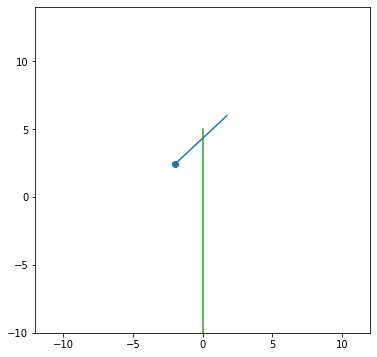

0


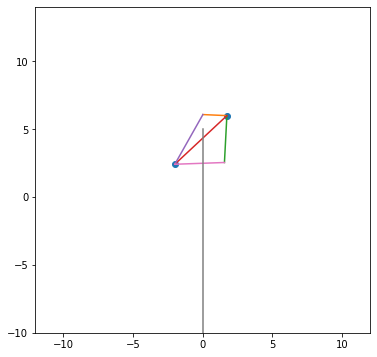

1


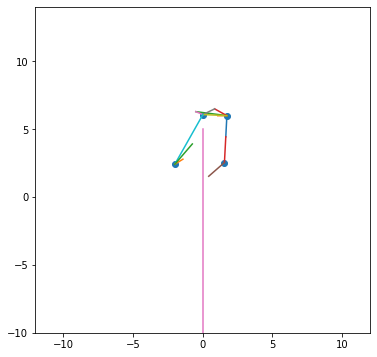

2


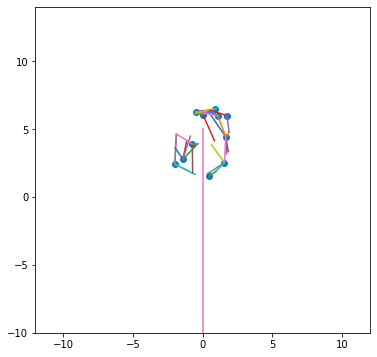

3


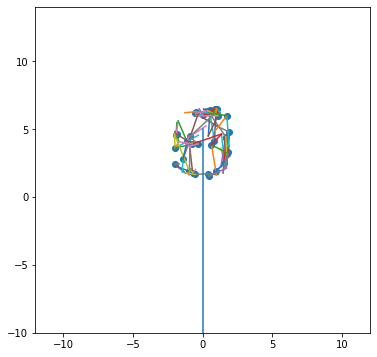

4


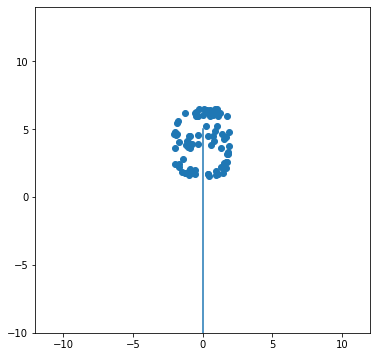

5


In [15]:
for (lvl_i,(pts,members)) in enumerate(zip(level_pts, level_members)):
    
    plt.figure(figsize=(6,6))

    if lvl_i + 1 < len(level_pts):
        for (pt,pt_members) in zip(pts,members):
            
            for pt2 in level_pts[lvl_i+1][pt_members]:

                plt.plot([pt[0],pt2[0]],[pt[1],pt2[1]])
        
    # Create a Rectangle patch
    rect = plt.plot([0,0],[-10,5])

    plt.scatter(pts[:,0],pts[:,1])

    plt.xlim(-12,12)
    plt.ylim(-10,14)
    plt.show()
    
    print(lvl_i)

In [3]:
sample_clusters = [{i} for (i,_) in enumerate(level_pts[-1])]
sample_cluster_levels = []

for lvl in level_members[-2::-1]:
    sample_clusters = [{m for i in cl for m in sample_clusters[i]} for cl in lvl]
    sample_cluster_levels.append(sample_clusters)

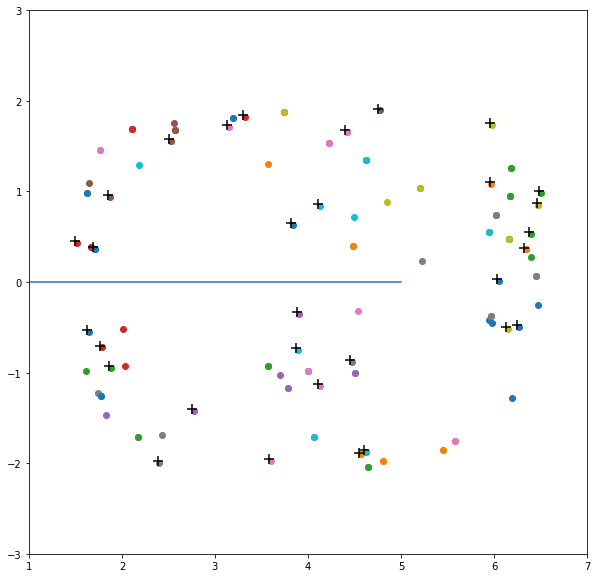

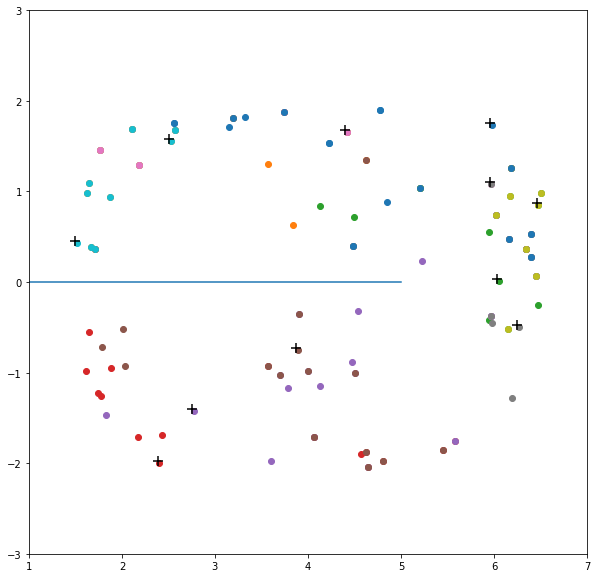

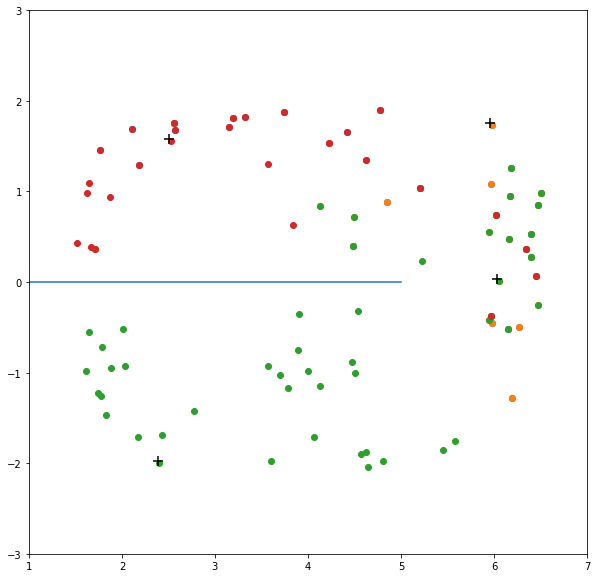

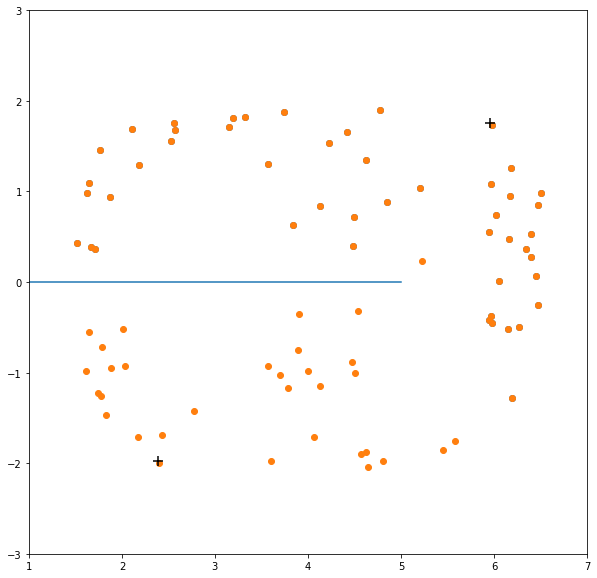

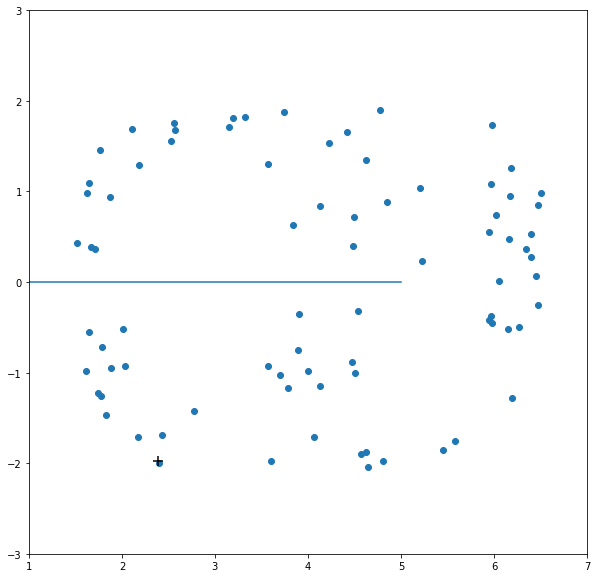

In [10]:
for level,reprs in zip(sample_cluster_levels, level_pts[-2::-1]):
    plt.figure(figsize=(10,10))
    for (i,clusters) in enumerate(level):
        pts_in_cluster = np.array([level_pts[-1][state_i] for state_i in clusters])
        plt.scatter(pts_in_cluster[:,1],pts_in_cluster[:,0])
        
    reprs = np.array(reprs)
    
    plt.scatter(reprs[:,1]-0.02,reprs[:,0]+0.02, s=100, marker='+', c='black')
        
    plt.ylim(-3,3)
    plt.xlim(1,7)
    rect = plt.plot([5,-10],[0,0])
    plt.show()

[[-2.00053  2.40258]]


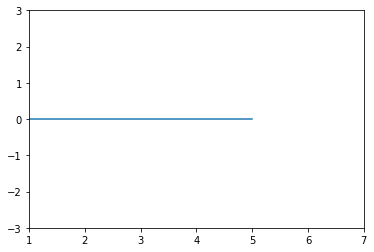

[[-2.00053  2.40258]]


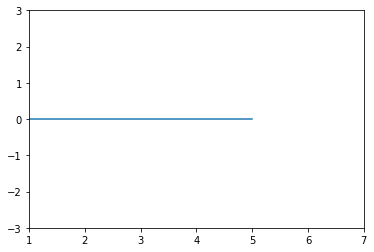

[[-2.00053  2.40258]
 [-1.41988  2.77496]]


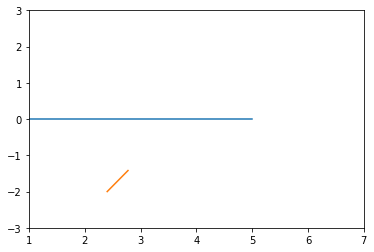

[[-0.550216  1.64947 ]
 [-1.90365   4.57264 ]
 [-0.884345  4.46889 ]]


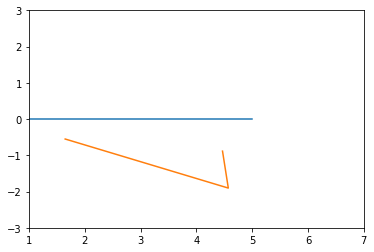

[[-1.2538    1.77549 ]
 [ 0.368455  1.70872 ]
 [-1.87386   4.61883 ]
 [-0.374465  5.96641 ]]


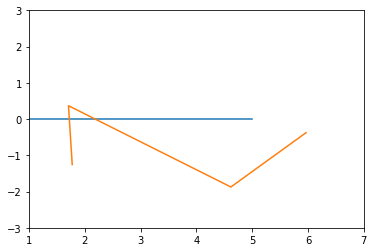

In [30]:
with open('ordering.txt') as f:
    pts = f.read().split("\n")[:-1]
    for pts_layer, pts_coords in zip(pts,level_pts[1:]):
        pt_ids = list(map(int,pts_layer.split(',')[:-1]))
        traj_coords = np.array([pts_coords[i] for i in pt_ids])
        plt.figure()
        plt.ylim(-3,3)
        plt.xlim(1,7)
        plt.plot([5,-10],[0,0])
        print(traj_coords)
        plt.plot(traj_coords[:,1],traj_coords[:,0])
        plt.show()

[array([[ 1.73181,  5.98039],
        [-2.00053,  2.40258]]),
 array([[ 1.73181  ,  5.98039  ],
        [ 0.0123874,  6.05811  ],
        [-2.00053  ,  2.40258  ],
        [ 1.55677  ,  2.53074  ]]),
 array([[ 1.65332  ,  4.41983  ],
        [ 1.55677  ,  2.53074  ],
        [ 0.0123874,  6.05811  ],
        [-2.00053  ,  2.40258  ],
        [-1.41988  ,  2.77496  ],
        [-0.745871 ,  3.8958   ],
        [ 1.08017  ,  5.97326  ],
        [-0.497816 ,  6.2731   ],
        [ 0.853148 ,  6.47772  ],
        [ 0.430161 ,  1.51906  ],
        [ 1.73181  ,  5.98039  ]]),
 array([[ 0.0123874,  6.05811  ],
        [ 1.55677  ,  2.53074  ],
        [ 0.533512 ,  6.39438  ],
        [-0.722744 ,  1.784    ],
        [ 0.360115 ,  6.34532  ],
        [ 1.89402  ,  4.77845  ],
        [-1.97278  ,  3.59736  ],
        [-2.00053  ,  2.40258  ],
        [-1.87386  ,  4.61883  ],
        [ 1.65332  ,  4.41983  ],
        [-0.497816 ,  6.2731   ],
        [-1.90365  ,  4.57264  ],
        [-0.9522